In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import kerasNN
import datacontrol
import validation
import itertools

Using TensorFlow backend.


In [33]:
models = [ [100,100,100], [500,500,500], [100,100,100,100], [500,500,500, 500]]
activation = ["relu"]
TrainingData = datacontrol.readFile("../data/ML-CUP18-TR.csv")
X, Y = datacontrol.divide(TrainingData)

In [34]:
results = []
for i in itertools.product(models, activation):
    print(i)
    NN = kerasNN.KerasNN(NetworArchitecture = i[0], activation = i[1], epochs = 2000)
    val, train = NN.trainCV(X, Y )
    results.append([*val, *train, i[0], i[1]])

([100, 100, 100], 'relu')
kerasNN


 Time: 190.46
0.87 (+/- 0.09)
0.28 (+/- 0.04)
([500, 500, 500], 'relu')
kerasNN



KeyboardInterrupt: 

In [24]:
newresults = []
for i in results:
    newresults.append([np.mean(np.array(i[:3])),np.mean(np.array(i[4:7])),  i[8], i[9]])
df = pd.DataFrame(newresults)

In [25]:
df.to_csv("DIO.csv")
df = pd.read_csv("DIO.csv")

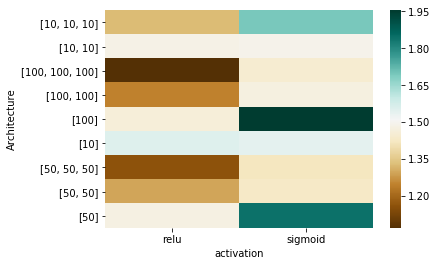

In [26]:
df = df.rename(index=str, columns={"0": "mean Validation Error", "2": "Architecture", "3":"activation"})
df = df.pivot("Architecture", "activation", "mean Validation Error")
ax = sns.heatmap(df, cmap="BrBG")

In [ ]:
NN = kerasNN.KerasNN(NetworArchitecture = [100,100,100], activation = "relu", eta = 0.001, momentum = 0.1, epochs = 2000)
val, train = NN.trainCV(X, Y,plot = True )

kerasNN

